# Vježbe 11 - 18.05.2023. - Autoencoderi

Autoencoders consist of two networks:

* Encoder
* Decoder

The goal of the **encoder** is to compress an image, video, or any piece of data that can be represented as a tensor, into a _latent vector_. The **decoder** does, as you might have guessed, the exact opposite.

To maximize performance, minimize the loss that is, encoders and decoders are typically symmetrical together. Naturally, the input size is equal to the output size of an autoencoder.

Autoencoders always have less input neurons in the middle layer than in the input and output layer. This is called the **bottleneck**. If it weren't for this bottleneck, the autoencoders could just copy this data over from the input to the output layer without compressing it.

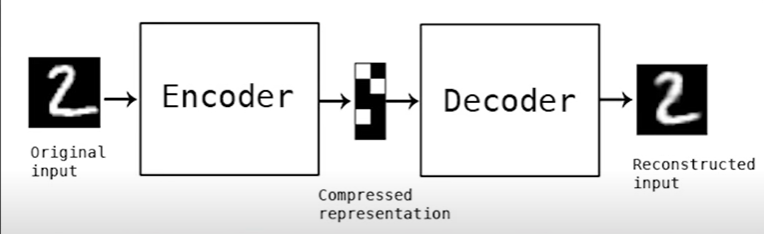

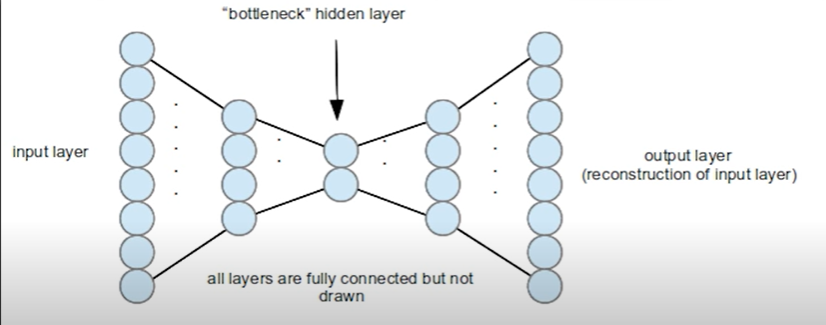

In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
encoder=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu")   #bottleneck
])

In [ ]:
decoder=keras.models.Sequential([
    keras.layers.Dense(100, activation="relu",input_shape=[30]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28,28])
])

In [ ]:
stacked_autoencoder=keras.models.Sequential([encoder,decoder])

In [ ]:
stacked_autoencoder.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
history=stacked_autoencoder.fit(x_train,x_train, epochs=10,validation_data=[x_test,x_test])

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.1457 - accuracy: 0.2127 - val_loss: 0.1083 - val_accuracy: 0.2519
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1042 - accuracy: 0.2630 - val_loss: 0.0990 - val_accuracy: 0.2646
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0981 - accuracy: 0.2744 - val_loss: 0.0951 - val_accuracy: 0.2732
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0952 - accuracy: 0.2804 - val_loss: 0.0933 - val_accuracy: 0.2767
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0933 - accuracy: 0.2839 - val_loss: 0.0915 - val_accuracy: 0.2809
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0920 - accuracy: 0.2881 - val_loss: 0.0905 - val_accuracy: 0.2824
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0909 - accuracy: 0.2916 - val_loss: 0.0895 - val_accuracy

1/1 [==============================] - 0s 29ms/step


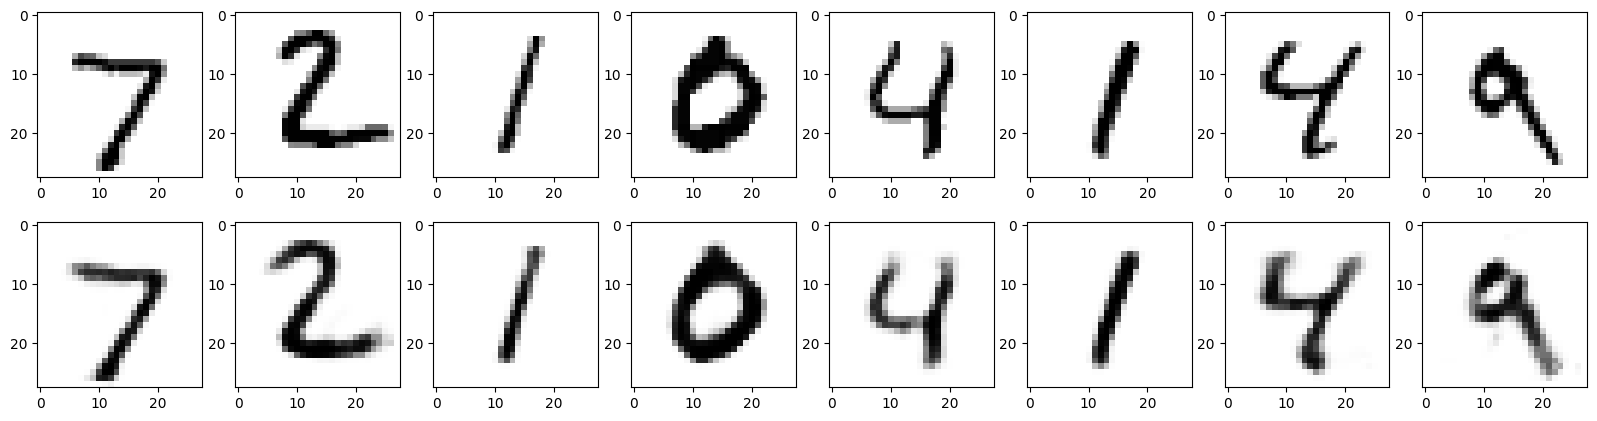

In [ ]:
plt.figure(figsize=(20,5))

for i in range(8):
  plt.subplot(2,8,i+1)
  plt.imshow(x_test[i], cmap="binary")

  plt.subplot(2,8,8+1+i)
  pred=stacked_autoencoder.predict(x_test[i].reshape(1,28,28))
  plt.imshow(pred.reshape(28,28),cmap="binary")

1/1 [==============================] - 0s 17ms/step


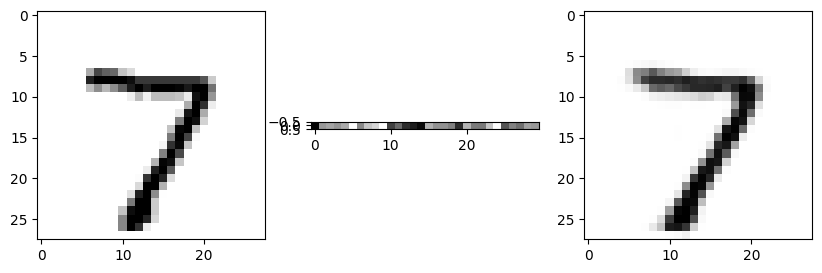

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(x_test[0], cmap="binary")

plt.subplot(1,3,2)
latent_vector=encoder.predict(x_test[0].reshape(1,28,28))
plt.imshow(latent_vector, cmap="binary")

plt.subplot(1,3,3)
pred=decoder.predict(latent_vector)
plt.imshow(pred.reshape(28,28),cmap="binary")

In [ ]:
1-30/(28*28)

0.9617346938775511

## Denoising autoencoder

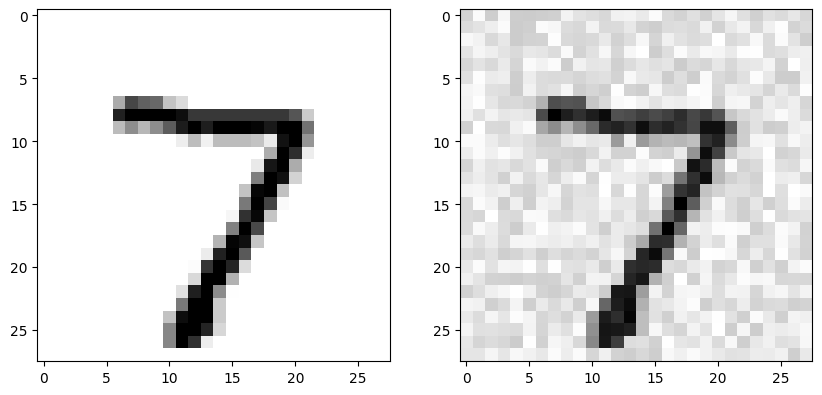

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(x_test[0], cmap="binary")

plt.subplot(1,2,2)
noise=np.random.random((28,28))/4
plt.imshow(x_test[0]+noise, cmap="binary")

In [ ]:
encoder=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"), ######
    keras.layers.Dense(30, activation="relu")   #bottleneck
])

In [ ]:
decoder=keras.models.Sequential([
    keras.layers.Dense(100, activation="relu",input_shape=[30]),
    keras.layers.Dense(100, activation="relu"),#####
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28,28])
])

In [ ]:
stacked_autoencoder=keras.models.Sequential([encoder,decoder])

In [ ]:
stacked_autoencoder.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
#dodavanje šuma
x_train_noise=x_train+((np.random.random(x_train.shape))/4)
x_test_noise=x_test+((np.random.random(x_test.shape))/4)

In [ ]:
history=stacked_autoencoder.fit(x_train_noise,x_train, epochs=10,validation_data=[x_test_noise,x_test])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1665 - accuracy: 0.1801 - val_loss: 0.1280 - val_accuracy: 0.2198
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1209 - accuracy: 0.2367 - val_loss: 0.1128 - val_accuracy: 0.2482
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1110 - accuracy: 0.2529 - val_loss: 0.1065 - val_accuracy: 0.2560
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1064 - accuracy: 0.2606 - val_loss: 0.1036 - val_accuracy: 0.2563
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1034 - accuracy: 0.2665 - val_loss: 0.1009 - val_accuracy: 0.2624
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1012 - accuracy: 0.2702 - val_loss: 0.1008 - val_accuracy: 0.2713
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0997 - accuracy: 0.2740 - val_loss: 0.0985 - val_accuracy

1/1 [==============================] - 0s 18ms/step


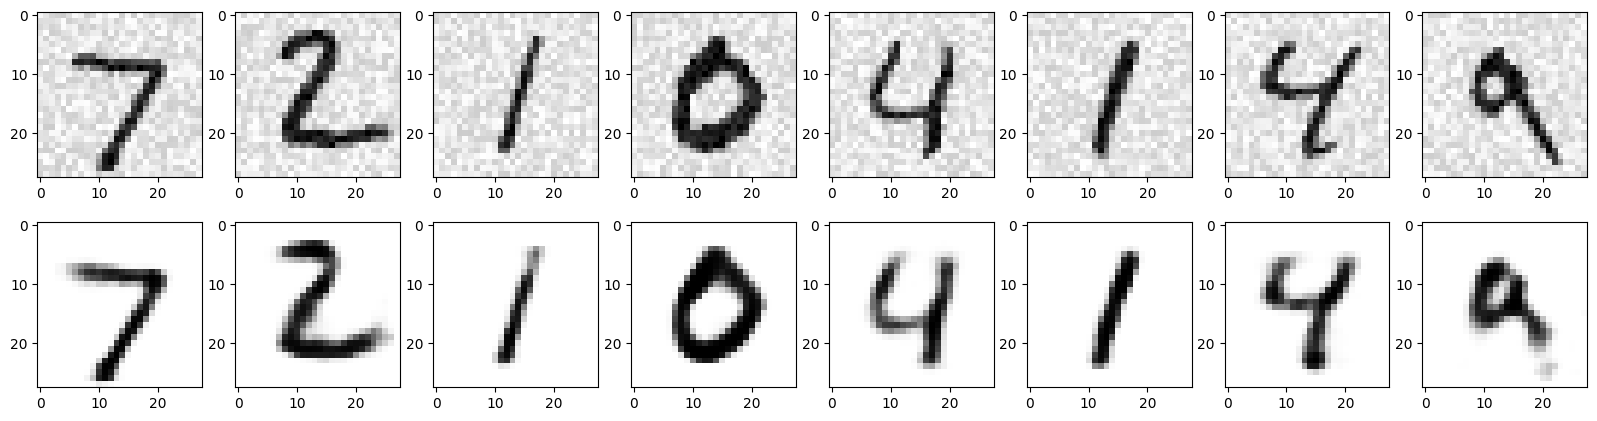

In [ ]:
plt.figure(figsize=(20,5))

for i in range(8):
  plt.subplot(2,8,i+1)
  plt.imshow(x_test_noise[i], cmap="binary")

  plt.subplot(2,8,8+1+i)
  pred=stacked_autoencoder.predict(x_test_noise[i].reshape(1,28,28))
  plt.imshow(pred.reshape(28,28),cmap="binary")

## Convolutional autoencoder

Apart from data compression, autoencoders can also be used for self-supervised image classification.

The first layers of the encoder learn to recognize patterns in the data very well in order to compress the data. If you don't have access to much labelled data, but a lot of unlabelled data, it's possible to train an autoencoder and copy the first layers from the autoencoder to the classifier network. This can be compared to transfer learning, where you only have to train the head afterwards.

It is well known that convolutional layers are perfect for finding patterns in data, so it's good to know they can also be used in autoencoders. To "de-convolve" images in the decoder, transposed convolutional layers are used. For more information on transposed convolutional layers, checkout [this blog post](https://rickwierenga.com/blog/s4tf/s4tf-gan.html) I have written which explains them in more detail. See the last section "Autoencoders and GANs" of this notebook for more information on the beautiful relation between GANs and autoencoders.

Let's look at a convolutional encoder:

In [ ]:
encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2)
])

The weights learnt by this encoder could be copied to the classifier.

In [ ]:
encoder.predict(x_test[0].reshape((1, 28, 28))).shape   #ovo nam treba za input shape napisat 1 je uspred jer je samo za jednu sliku tu gledano

1/1 [==============================] - 4s 4s/step


(1, 3, 3, 64)

Notice how $z \in \mathbb{R}^{1 \times 3 \times 3 \times 64}$. Now we build its counterpart, the decoder, with transposed convolutional layers to recreate a grayscale $28 \times 28$ image.

In [ ]:
decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=2, padding="valid",
                                 activation="relu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="relu"),
    keras.layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [ ]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                            optimizer='adam', metrics=['accuracy'])

In [ ]:
history = stacked_autoencoder.fit(x_train, x_train, epochs=5,   #stavi 10
                         validation_data=[x_test, x_test])

Epoch 1/5
1875/1875 [==============================] - 15s 6ms/step - loss: 0.1196 - accuracy: 0.3604 - val_loss: 0.0837 - val_accuracy: 0.4029
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0814 - accuracy: 0.4068 - val_loss: 0.0781 - val_accuracy: 0.4058
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0772 - accuracy: 0.4227 - val_loss: 0.0751 - val_accuracy: 0.4209
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0749 - accuracy: 0.4296 - val_loss: 0.0738 - val_accuracy: 0.4204
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0733 - accuracy: 0.4381 - val_loss: 0.0724 - val_accuracy: 0.4341


1/1 [==============================] - 0s 18ms/step


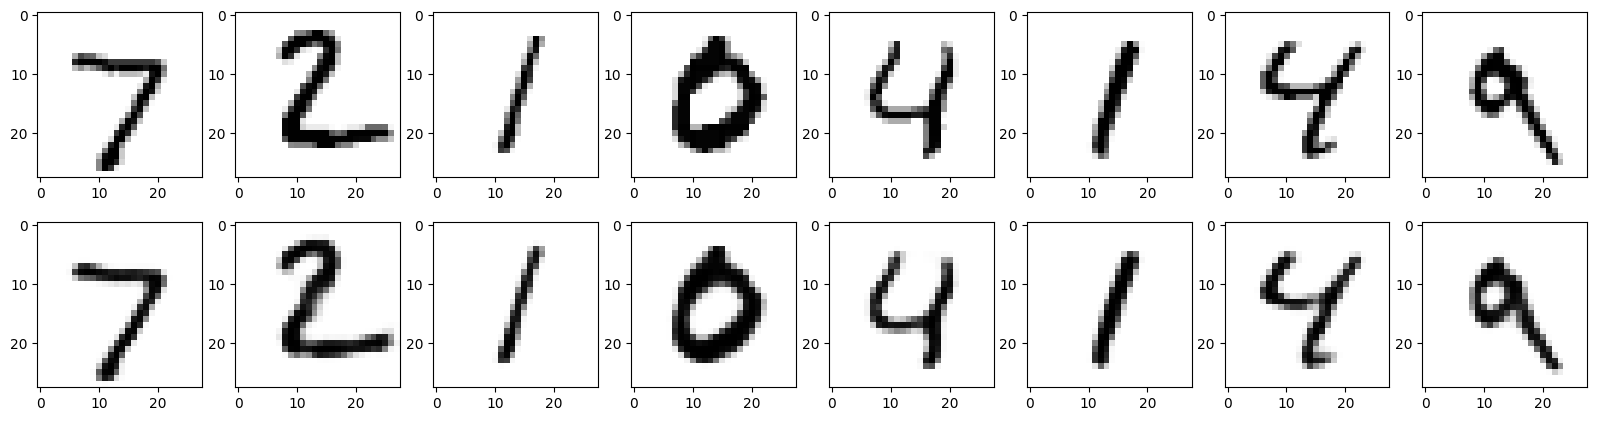

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(8):
  plt.subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  plt.imshow(x_test[i], cmap="binary")

  plt.subplot(2, 8, i+8+1)
  plt.imshow(pred.reshape((28, 28)), cmap="binary")

Let's look at the weights the encoder learnt. Note that $\sqrt{64} = 8$.

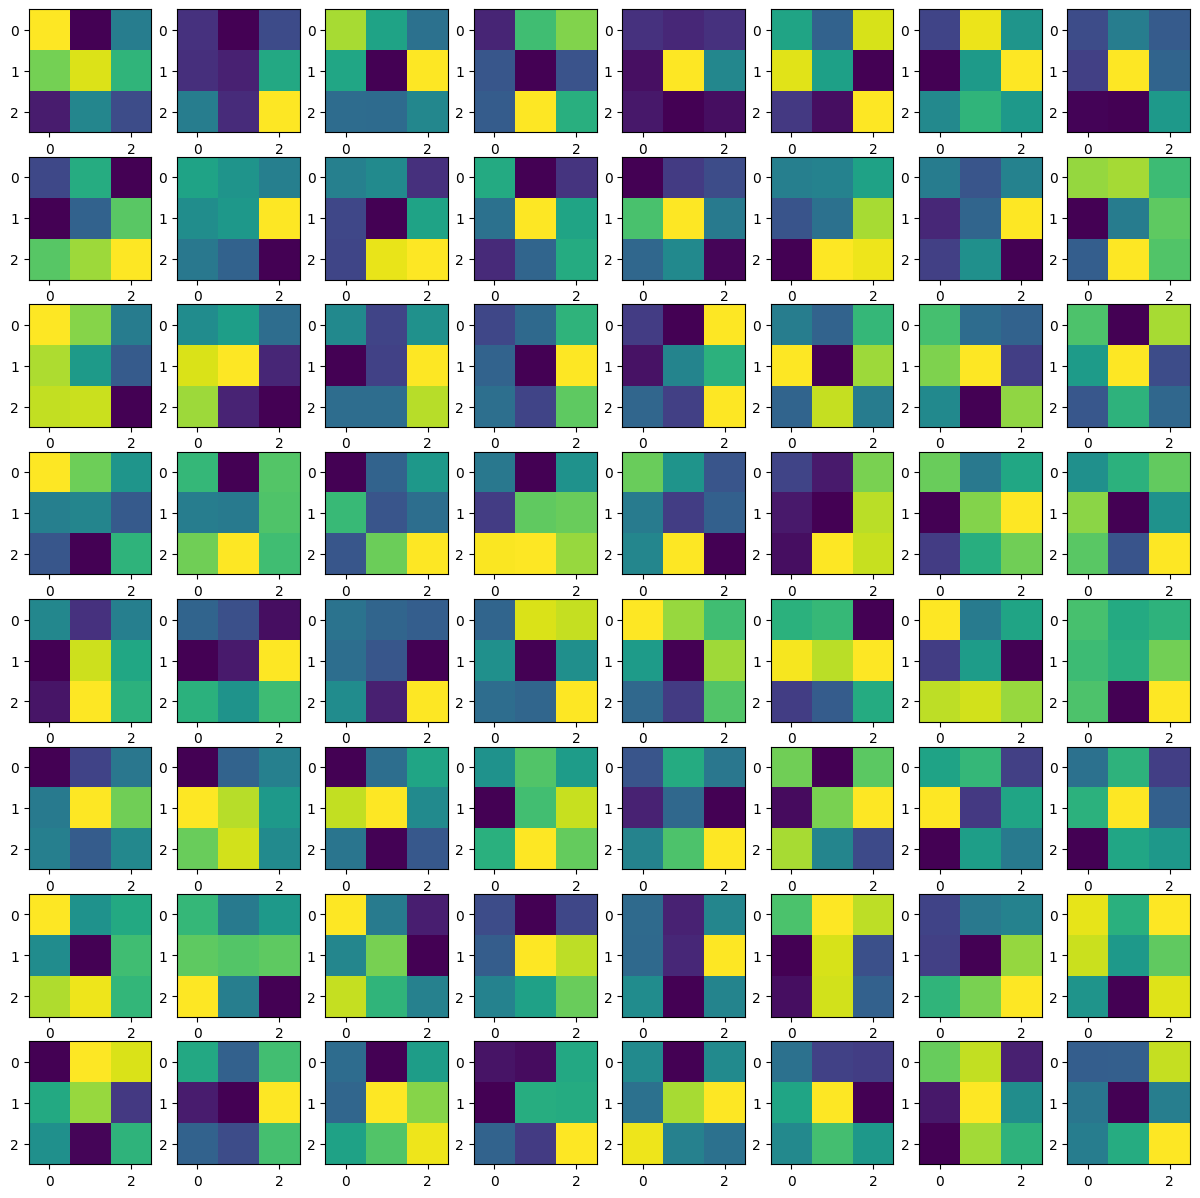

In [ ]:
plt.figure(figsize=(15,15))
for i in range(8 * 8):
  plt.subplot(8, 8, i+1)
  plt.imshow(encoder.layers[-2].weights[0][:, :, 0, i])

Visually not very pleasing, but proven to be effective as shown in the previous figure.

$3 \times 3 \times 64=576$ is still less than $28 \times 28 = 784$, thus creating a bottleneck, but much less compressed than the dense encoder making convolutional encoders less suitable for comporession. But thanks to their convolutional layers, they are great to use in cases where you want your autoencoder to find visual patterns in your data.

## Autoencoders and GANs

If you have ever worked with GANs, you have probably noticed some similarities between the generator and decoders by now. Both create images that look like images in the dataset from latent vectors. In fact, the decoder we used for the convolutional auto encoder is one that could be used in DCGANs ([ref](https://rickwierenga.com/blog/s4tf/s4tf-gan.html)).

By encoding training images into latent vectors using an encoder, it's possible to manipulate the output of the generator by manipulating the latent vectors.

* Combining latent vectors of particular training examples into a single latent vector to combine the features of the training examples in a single image.
* That's what researchers at NVIDIA built upon by transitioning latent vectors it's possible to create videos like these:

https://www.youtube.com/watch?v=6E1_dgYlifc

---
made by [@rickwierenga](https://twitter.com/rickwierenga). [GitHub version](https://github.com/rickwierenga/notebooks/blob/master/autoencoders.ipynb)